# Notebook For Feature Extraction : Signboards + Lanes

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import os
def clear():
    os.system( 'cls' )
from IPython.display import clear_output
clear_output(wait=True)

In [40]:
img = cv2.imread(r'C:\Users\nishc_omjn2ty\Downloads\trial2.jpeg')
#img = cv2.resize(img,(500,400))
img = cv2.resize(img,(700,400))
cv2.imshow("Image",img)
cv2.waitKey(0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2BW)

-1

In [41]:
# Cropping the region of interest
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

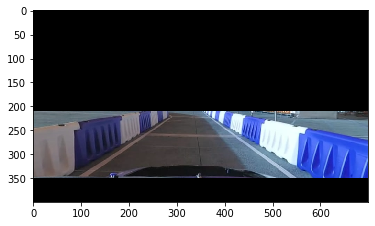

In [42]:
#Try for an image
region_of_interest_vertices = [
    (0, 350),
    (0,210),
    (700, 210),
    (700, 350),
]
cropped_image = region_of_interest(
    img,
    np.array([region_of_interest_vertices], np.int32),
)

plt.imshow(cropped_image)
#cv2.waitKey(0)

# Custom filter implementation
Refer for filters: https://setosa.io/ev/image-kernels/ 

In [43]:
kernel_l_sobel= np.array([[1, 0, -1],[2, 0 ,-2],[1, 0, -1]])

In [44]:
# Try on an Image
cropped_image=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
filtered_img_l = cv2.filter2D(cropped_image, -1, kernel_l_sobel)
cv2.imshow('filter_mask',filtered_img_l)
cv2.waitKey(0)

-1

In [45]:
kernel_r_sobel= np.array([[-1, 0, 1],[-2, 0 ,2],[-1, 0, 1]])

In [46]:
# Try on an Image
#cropped_image=cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(filtered_img_l, -1, kernel_r_sobel)
cv2.imshow('Gray',cropped_image)
cv2.imshow('filter_mask_l',filtered_img_l)
cv2.imshow('filter_mask_r+l',filtered_img)
cv2.waitKey(0)

-1

# Function to extract circles
### Used here to extract circular sign boards!


In [19]:
# For images
#img1 = cv2.imread(r'C:\Users\nishc_omjn2ty\Downloads\trial3.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.blur(img, (3, 3)) 
output=img
circles= cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, minDist=600, 
               param2 = 40, minRadius = 10, maxRadius = 30) 
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    mask = np.full((output.shape[0],output.shape[1]),0,dtype=np.uint8)
    for i in circles:
        cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),-1)
    fg= cv2.bitwise_or(output, output, mask=mask)
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    # show the output image
    cv2.imshow("output", np.hstack([img, output, fg]))
    cv2.waitKey(0)
else:
    print("Not found")

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\hough.cpp:1736: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


In [18]:
# For Videos

cap = cv2.VideoCapture(r"C:\Users\nishc_omjn2ty\Downloads\Sample_data.mp4")
k=0
while(cap.isOpened()): 
    _, frame = cap.read()
    if k%10 != 0:
        k=k+1
        print('skip')
        continue
    print('No skip')
    k=k+1
    frame = cv2.resize(frame,(700,400))
    lane_image = frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    output=frame
    gray_blurred = cv2.blur(frame, (3, 3)) 
    circles= cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, minDist=600, 
               param2 = 40, minRadius = 10, maxRadius = 30) 
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        mask = np.full((output.shape[0],output.shape[1]),0,dtype=np.uint8)
        for i in circles:
            cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),-1)
        fg= cv2.bitwise_or(output, output, mask=mask)
    # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    # show the output image
    #Cropping happens based on the coordinates
        region_of_interest_vertices = [
                        (0, 350),
                        (0,210),
                        (700, 210),
                        (700, 350),
                                        ]
        cropped_image = region_of_interest(
                                            lane_image,
                                            np.array([region_of_interest_vertices], np.int32),
                                            )
        cropped_image=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        filtered_img = cv2.filter2D(cropped_image, -1, kernel_l_sobel)
        filtered_img = cv2.filter2D(filtered_img, -1, kernel_r_sobel)# Apply filter to cropped image
        vis_im = cv2.addWeighted(filtered_img, 2,fg, 0.5, 0) #Superimpose
        cv2.imshow("Lane+Sign Board Filter", np.hstack([frame, vis_im, fg]))
        cv2.waitKey(1)
        clear()
    else:
        region_of_interest_vertices = [
                        (0, 350),
                        (0,210),
                        (700, 210),
                        (700, 350),
                                        ]
        cropped_image = region_of_interest(
                                            lane_image,
                                            np.array([region_of_interest_vertices], np.int32),
                                            )
        cropped_image=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        filtered_img = cv2.filter2D(cropped_image, -1, kernel_l_sobel)
        filtered_img = cv2.filter2D(filtered_img, -1, kernel_r_sobel) # Apply filter to cropped image
        #vis_im = cv2.addWeighted(filtered_img, 2,fg, 0.5, 0)
        cv2.imshow("Lane+Sign Board Filter",np.hstack([frame, filtered_img]))
        cv2.waitKey(1)
        clear()
        print("Not found")
        
    

No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
sk

Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip
No skip
Not found
skip
skip
skip
skip
skip
skip
skip
skip
skip


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# Lane co-ordinates extraction

In [ ]:
#Function to crop the filtered_image
#Canny Edge detection applied 

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, 340 ),
   # (0, 100),
    (500/2,150),
    (500, 340),
]
cropped_image = region_of_interest(
    filtered_img,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
blur = cv2.GaussianBlur(gray_image, (5, 5), 0)  
canny = cv2.Canny(blur, 50, 150) 
plt.figure()
plt.imshow(cannyed_image)
plt.show()

In [ ]:
#Co-ordinates of the lines found
#HoughLine Transform applied
'''
lines = cv2.HoughLinesP(
    cannyed_image,
    rho=6,
    theta=np.pi / 360,
    threshold=300,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=35
)
'''
lines=cv2.HoughLinesP(cannyed_image, 2, np.pi / 180, 100, 
							np.array([]), minLineLength = 40, 
							maxLineGap = 5) 
print(lines)

In [ ]:
#Function to superimpose the lines found on filtered image

def draw_lines(img, lines, color=[255, 255, 255], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
            return
    # Make a copy of the original image.
    img = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    plt.imshow(line_img)
    plt.show()
    img= cv2.addWeighted(img, 0.8,line_img, 1, 0)
    # Return the modified image.
    return img

In [ ]:
#Driving Code for the above process

plt.imshow(filtered_img)
plt.show()
line_image = draw_lines(filtered_img, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()

# Final Image (Lanes + Signboard)

In [ ]:
#Superimposing the lanes image and traffic sign mask
vis_im = cv2.addWeighted(line_image, 0.5,fg, 0.5, 0)
vis_im = cv2.cvtColor(vis_im, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(vis_im)